In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [9]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [4]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
len(train_X)

60000

In [10]:
train_X.shape

(60000, 28, 28)

In [11]:
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(train_X, train_Y, epochs=10, batch_size=128, validation_data=(test_X, test_Y))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.8725 - loss: 0.4598 - val_accuracy: 0.9789 - val_loss: 0.0687
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9771 - loss: 0.0754 - val_accuracy: 0.9798 - val_loss: 0.0598
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9862 - loss: 0.0482 - val_accuracy: 0.9850 - val_loss: 0.0421
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9881 - loss: 0.0371 - val_accuracy: 0.9864 - val_loss: 0.0373
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9923 - loss: 0.0260 - val_accuracy: 0.9876 - val_loss: 0.0366
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9934 - loss: 0.0206 - val_accuracy: 0.9862 - val_loss: 0.0422
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.9884 - val_loss: 0.0352
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9960 - loss: 0.0132 - 

In [20]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04042678698897362
Test accuracy: 0.9878000020980835


In [14]:
test_X[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:
plt.imshow(test_X[0])

NameError: name 'plt' is not defined

In [16]:
plt.imshow(train_X[0])

NameError: name 'plt' is not defined

In [17]:
import matplotlib as plt

In [18]:
plt.imshow(train_X[0])

AttributeError: module 'matplotlib' has no attribute 'imshow'

In [22]:
import matplotlib.pyplot as plt

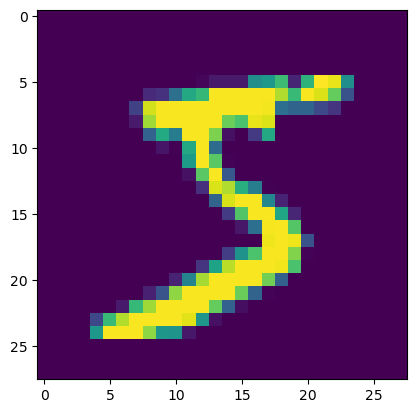

In [20]:
plt.imshow(train_X[0])

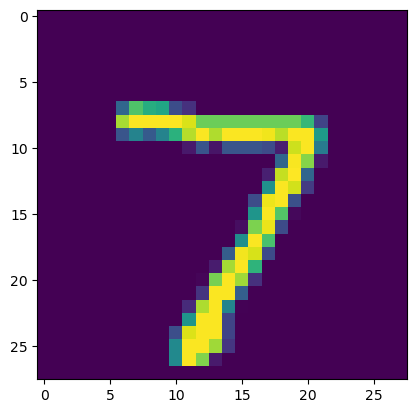

In [21]:
plt.imshow(test_X[0])

In [25]:
def Prediction(input_test):
     arr = model.predict(input_test.reshape(1,28,28)).argmax(axis=1)
     print(arr[0])

In [27]:
Prediction(test_X[8])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5


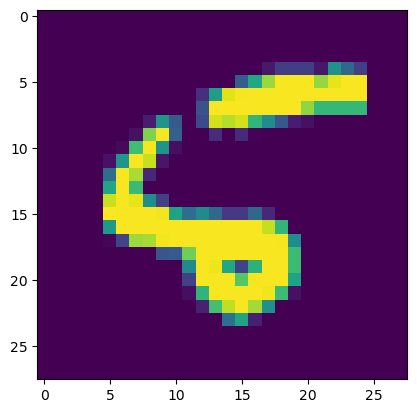

In [28]:
plt.imshow(test_X[8])

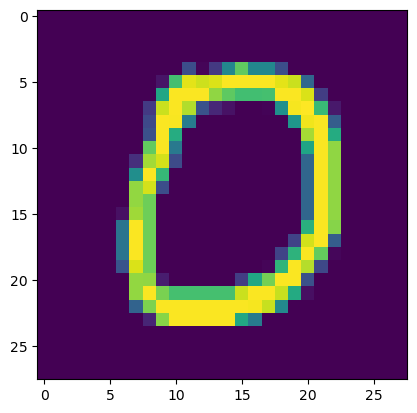

In [23]:
plt.imshow(test_X[10])

In [26]:
Prediction(test_X[10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
0


In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(train_X, train_Y, epochs=10, batch_size=128, validation_data=(test_X, test_Y))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8566 - loss: 0.4971 - val_accuracy: 0.9810 - val_loss: 0.0617
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9812 - loss: 0.0631 - val_accuracy: 0.9867 - val_loss: 0.0404
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9888 - val_loss: 0.0345
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9896 - val_loss: 0.0298
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 0.9890 - val_loss: 0.0335
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9938 - loss: 0.0195 - val_accuracy: 0.9910 - val_loss: 0.0247
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9900 - val_loss: 0.0287
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9963 - loss: 0.0109 - 

In [33]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02894112840294838
Test accuracy: 0.9919999837875366


In [34]:
def Prediction_model(input_test):
     arr = model.predict(input_test.reshape(1,28,28)).argmax(axis=1)
     print(arr[0])

In [35]:
Prediction_model(test_X[100])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
6


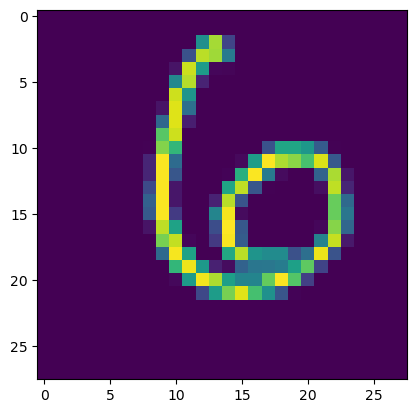

In [36]:
plt.imshow(test_X[100])